## TODO compare offset-subtraction to low-pass filtering

In [1]:
from importlib import reload
import matplotlib.pyplot as plt

from ptycho import params as p
from ptycho import tf_helper as hh

2023-04-24 16:02:30.843279: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-24 16:02:30.925263: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-04-24 16:02:31.243519: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/home/ollie/anaconda3/envs/tf/lib/:/home/ollie/anaconda3/envs/tf/lib/
2023-04-24 16:02:31.243559: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin

In [2]:
p.cfg['positions.provided'] = False
p.cfg['data_source'] = 'lines'
p.cfg['set_phi'] = True
p.cfg['nepochs'] = 60
p.cfg['sim_nphotons'] = 1e4

from ptycho import generate_data as init
# from ptycho import train

simulating gaussian position jitter, scale 0.0
Using provided scan point offsets
input shape (None, 64, 64, 1)
Instructions for updating:
Please pass an integer value for `reinterpreted_batch_ndims`. The current behavior corresponds to `reinterpreted_batch_ndims=tf.size(distribution.batch_shape_tensor()) - 1`.
simulating gaussian position jitter, scale 0.0
Using provided scan point offsets
0.99652237
nphoton 3.964021


## Full PINN model, best params:

In [3]:
from ptycho import params as p
p.cfg['data_source'] = 'lines'
p.cfg['offset'] = 4
p.cfg['max_position_jitter'] = 10
p.cfg['output_prefix'] = 'nphoton'

p.cfg['gridsize'] = 2
p.cfg['n_filters_scale'] = 2
p.cfg['object.big'] = False
p.cfg['intensity_scale.trainable'] = True

from ptycho import train, model
# reload(model)
# reload(train)

# print(p.cfg)
from ptycho.train import *

offset 4
Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input (InputLayer)             [(None, 64, 64, 4)]  0           []                               
                                                                                                  
 intensity_scaler (IntensitySca  (None, 64, 64, 4)   1           ['input[0][0]']                  
 ler)                                                                                             
                                                                                                  
 conv2d (Conv2D)                (None, 64, 64, 64)   2368        ['intensity_scaler[0][0]']       
                                                                                                  
 conv2d_1 (Conv2D)              (None, 64, 64, 64)   36928       ['conv2d[0][0]']  

 distribution_lambda (Distribut  ((None, 64, 64, 4),  0          ['intensity_scaler_inv[0][0]']   
 ionLambda)                      (None, 64, 64, 4))                                               
                                                                                                  
Total params: 4,397,955
Trainable params: 4,393,859
Non-trainable params: 4,096
__________________________________________________________________________________________________
None
using nominal scan positions for training


2023-04-24 16:03:47.468089: I tensorflow/core/profiler/lib/profiler_session.cc:101] Profiler session initializing.
2023-04-24 16:03:47.468105: I tensorflow/core/profiler/lib/profiler_session.cc:116] Profiler session started.
2023-04-24 16:03:47.468125: I tensorflow/core/profiler/backends/gpu/cupti_tracer.cc:1664] Profiler found 1 GPUs
2023-04-24 16:03:47.470898: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcupti.so.11.2'; dlerror: libcupti.so.11.2: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/home/ollie/anaconda3/envs/tf/lib/:/home/ollie/anaconda3/envs/tf/lib/
2023-04-24 16:03:47.526363: I tensorflow/core/profiler/lib/profiler_session.cc:128] Profiler session tear down.
2023-04-24 16:03:47.526461: I tensorflow/core/profiler/backends/gpu/cupti_tracer.cc:1798] CUPTI activity buffer flushed


Epoch 1/60


2023-04-24 16:03:52.554225: I tensorflow/core/util/cuda_solvers.cc:179] Creating GpuSolver handles for stream 0x80b92f0
2023-04-24 16:03:53.315529: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8100


732/732 [==============================] - 13s 14ms/step - loss: 4261.2539 - trimmed_obj_loss: 0.1202 - intensity_scaler_inv_loss: 0.1067 - distribution_lambda_loss: 4261.2539 - probe_illumination_loss: 0.0306 - val_loss: 3564.0068 - val_trimmed_obj_loss: 0.1218 - val_intensity_scaler_inv_loss: 0.1033 - val_distribution_lambda_loss: 3564.0068 - val_probe_illumination_loss: 0.0314 - lr: 0.0010
Epoch 2/60
732/732 [==============================] - 9s 13ms/step - loss: 3545.1575 - trimmed_obj_loss: 0.1093 - intensity_scaler_inv_loss: 0.1065 - distribution_lambda_loss: 3545.1575 - probe_illumination_loss: 0.0306 - val_loss: 3477.7981 - val_trimmed_obj_loss: 0.1042 - val_intensity_scaler_inv_loss: 0.1083 - val_distribution_lambda_loss: 3477.7981 - val_probe_illumination_loss: 0.0314 - lr: 0.0010
Epoch 3/60
732/732 [==============================] - 9s 13ms/step - loss: 3431.0684 - trimmed_obj_loss: 0.1044 - intensity_scaler_inv_loss: 0.1082 - distribution_lambda_loss: 3431.0684 - probe_illu

732/732 [==============================] - 9s 13ms/step - loss: 3186.9246 - trimmed_obj_loss: 0.1999 - intensity_scaler_inv_loss: 0.1024 - distribution_lambda_loss: 3186.9246 - probe_illumination_loss: 0.0306 - val_loss: 3164.7815 - val_trimmed_obj_loss: 0.1978 - val_intensity_scaler_inv_loss: 0.1021 - val_distribution_lambda_loss: 3164.7815 - val_probe_illumination_loss: 0.0314 - lr: 5.0000e-04
Epoch 21/60
732/732 [==============================] - 9s 13ms/step - loss: 3176.3472 - trimmed_obj_loss: 0.2014 - intensity_scaler_inv_loss: 0.1023 - distribution_lambda_loss: 3176.3472 - probe_illumination_loss: 0.0306 - val_loss: 3164.5916 - val_trimmed_obj_loss: 0.1994 - val_intensity_scaler_inv_loss: 0.1005 - val_distribution_lambda_loss: 3164.5916 - val_probe_illumination_loss: 0.0314 - lr: 5.0000e-04
Epoch 22/60
732/732 [==============================] - 9s 13ms/step - loss: 3179.2087 - trimmed_obj_loss: 0.2029 - intensity_scaler_inv_loss: 0.1023 - distribution_lambda_loss: 3179.2087 - p

Epoch 38/60
732/732 [==============================] - 9s 13ms/step - loss: 3129.3643 - trimmed_obj_loss: 0.2063 - intensity_scaler_inv_loss: 0.1012 - distribution_lambda_loss: 3129.3643 - probe_illumination_loss: 0.0306 - val_loss: 3138.8660 - val_trimmed_obj_loss: 0.2038 - val_intensity_scaler_inv_loss: 0.1010 - val_distribution_lambda_loss: 3138.8660 - val_probe_illumination_loss: 0.0314 - lr: 1.0000e-04
Epoch 39/60
732/732 [==============================] - 9s 13ms/step - loss: 3128.3181 - trimmed_obj_loss: 0.2063 - intensity_scaler_inv_loss: 0.1012 - distribution_lambda_loss: 3128.3181 - probe_illumination_loss: 0.0306 - val_loss: 3138.3923 - val_trimmed_obj_loss: 0.2038 - val_intensity_scaler_inv_loss: 0.1006 - val_distribution_lambda_loss: 3138.3923 - val_probe_illumination_loss: 0.0314 - lr: 1.0000e-04
Epoch 40/60
732/732 [==============================] - 9s 13ms/step - loss: 3127.8298 - trimmed_obj_loss: 0.2064 - intensity_scaler_inv_loss: 0.1011 - distribution_lambda_loss: 3

Epoch 58/60
732/732 [==============================] - 9s 13ms/step - loss: 3112.7651 - trimmed_obj_loss: 0.2063 - intensity_scaler_inv_loss: 0.1010 - distribution_lambda_loss: 3112.7651 - probe_illumination_loss: 0.0306 - val_loss: 3136.7922 - val_trimmed_obj_loss: 0.2045 - val_intensity_scaler_inv_loss: 0.1019 - val_distribution_lambda_loss: 3136.7922 - val_probe_illumination_loss: 0.0314 - lr: 1.0000e-04
Epoch 59/60
732/732 [==============================] - 9s 13ms/step - loss: 3112.0903 - trimmed_obj_loss: 0.2063 - intensity_scaler_inv_loss: 0.1010 - distribution_lambda_loss: 3112.0903 - probe_illumination_loss: 0.0306 - val_loss: 3136.7498 - val_trimmed_obj_loss: 0.2043 - val_intensity_scaler_inv_loss: 0.1012 - val_distribution_lambda_loss: 3136.7498 - val_probe_illumination_loss: 0.0314 - lr: 1.0000e-04
Epoch 60/60
129/129 [==============================] - 7s 49ms/step


In [6]:
from ptycho.evaluation import eval_pinn

In [7]:
stitched_obj = reassemble(b, part = 'complex')
_, (mae_amp, mae_phi), (mse_amp, mse_phi) = eval_pinn(stitched_obj, YY_ground_truth)
(mae_amp, mae_phi), (mse_amp, mse_phi)

mean scale adjustment: 1.2450825
mean scale adjustment: 1.2450825
mean scale adjustment: 1
mean scale adjustment: 1


((0.017933078, 0.0353433826496712), (0.0005160883, 0.0019920753213198907))

In [6]:
stitched_phase = np.angle(stitched_obj)#init.stitch(b, 1, norm = False, nsegments = params()['nsegments'],
                       #part = 'phase')

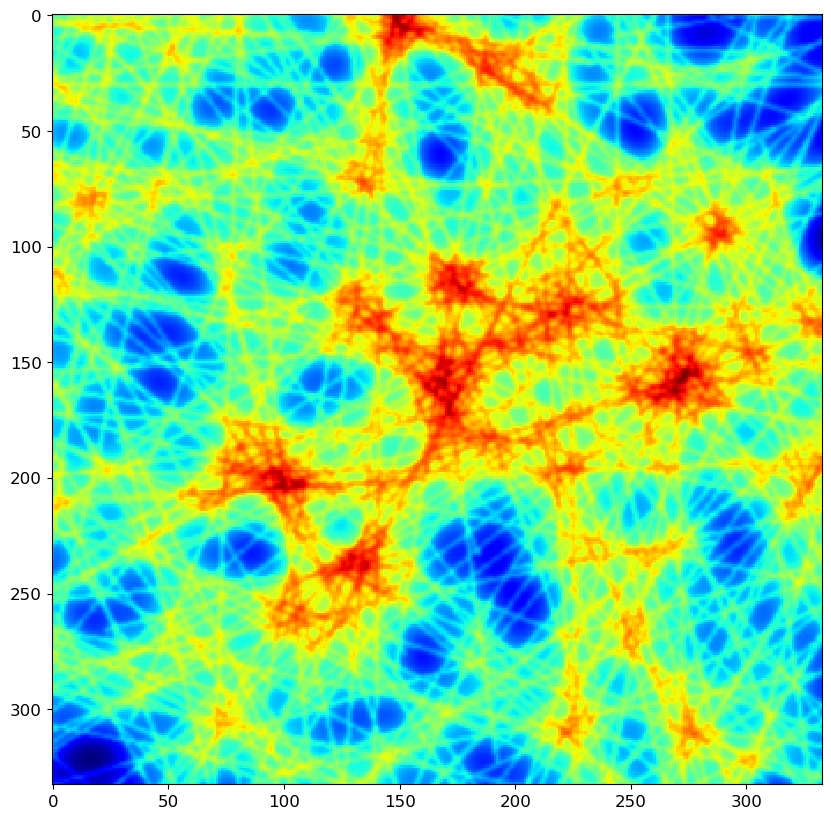

In [7]:
plt.rcParams["figure.figsize"] = (10, 10)
plt.imshow(np.absolute(init.YY_ground_truth), interpolation = 'none',
          cmap = 'jet')


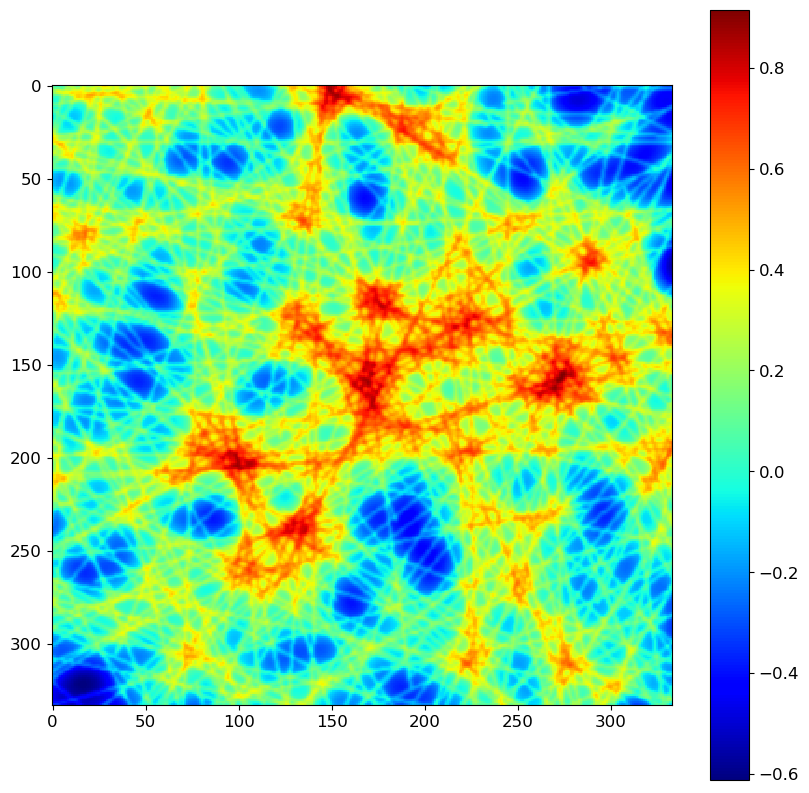

In [8]:
# vmin = np.min(YY_I_test_full[0, clipleft: -clipright, clipleft: -clipright])
# vmax = np.max(YY_I_test_full[0, clipleft: -clipright, clipleft: -clipright])
plt.imshow(np.angle(init.YY_ground_truth), interpolation = 'none',
          cmap = 'jet')
plt.colorbar()

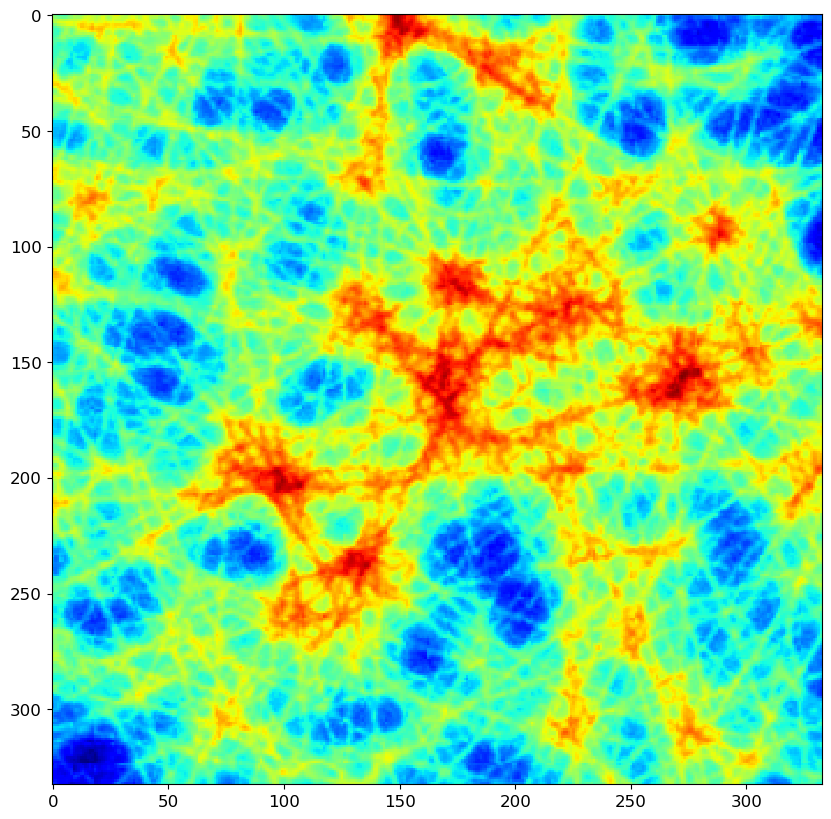

In [9]:
plt.rcParams["figure.figsize"] = (10, 10)
 
import matplotlib.pyplot as plt
plt.imshow(stitched[0], cmap = 'jet', interpolation='none')

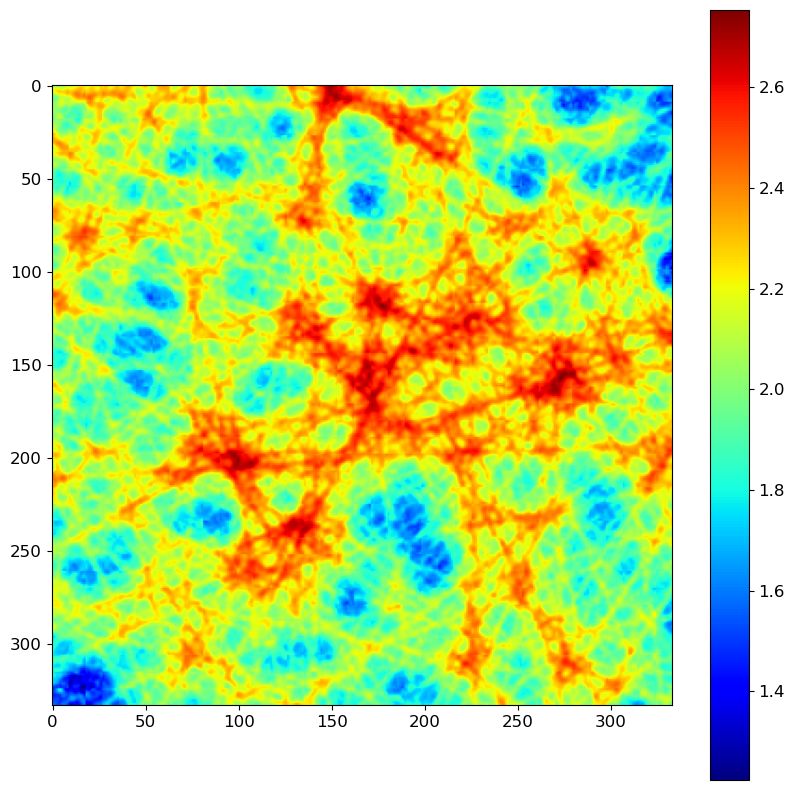

In [10]:
plt.rcParams["figure.figsize"] = (10, 10)

plt.imshow(np.angle(stitched_obj)[0], cmap = 'jet')
plt.colorbar()

In [11]:
# aphi = stitched_phase[0].squeeze()
# ns = np.linspace(1, 20).astype(int)
# maes = [mae(lowpass2d(np.squeeze(YY_phi_ground_truth), n = n), lowpass2d(aphi, n = n), normalize=False)
#         / np.absolute(lowpass2d(np.squeeze(YY_phi_ground_truth), n = n)).mean() for n in ns]
# plt.plot(ns, maes)
# n = 2
# mae(lowpass2d(np.squeeze(YY_phi_ground_truth), n = n), lowpass2d(aphi, n = n), normalize=False)
#plt.imshow(lowpass2d(np.squeeze(YY_phi_ground_truth), n = 2), cmap = 'jet', vmin = -.5, vmax = .5)

findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


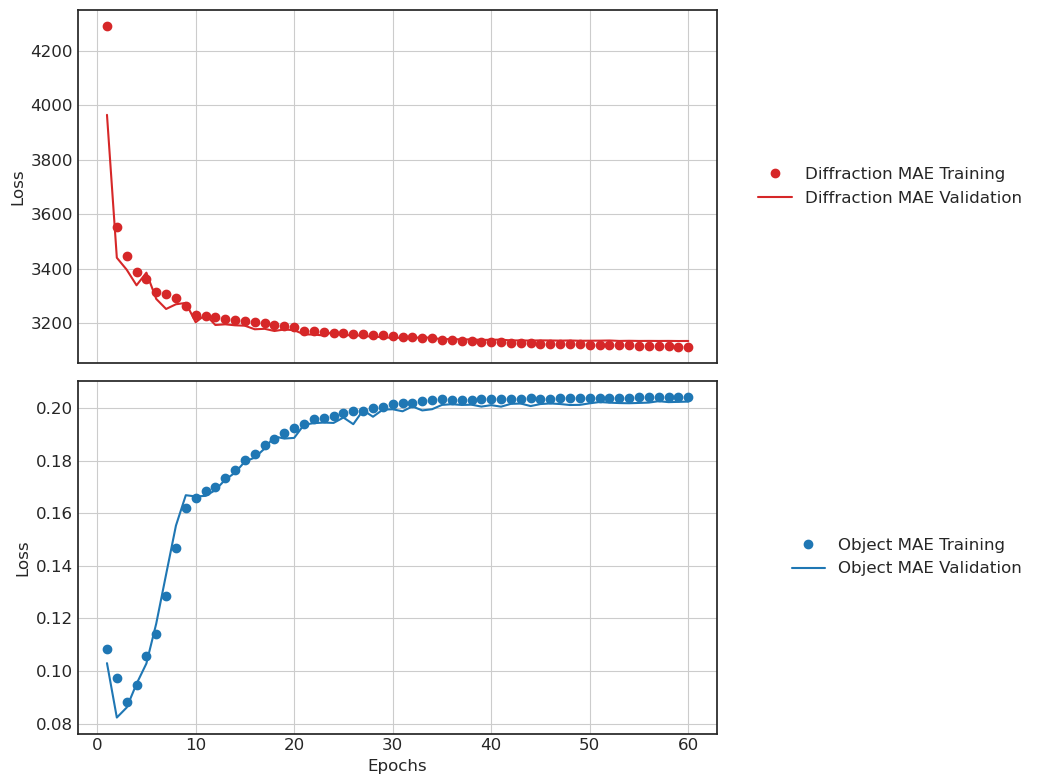

In [12]:
from ptycho import evaluation
reload(evaluation)

evaluation.plt_metrics(history, metric2 = 'trimmed_obj_loss')

phase min: 0.0 phase max: 2.816408


/home/ollie/Documents/scratch/ptycho/notebooks/ptycho/evaluation.py:60: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(X_test)[i, :, :, channel], cmap = 'jet')
findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


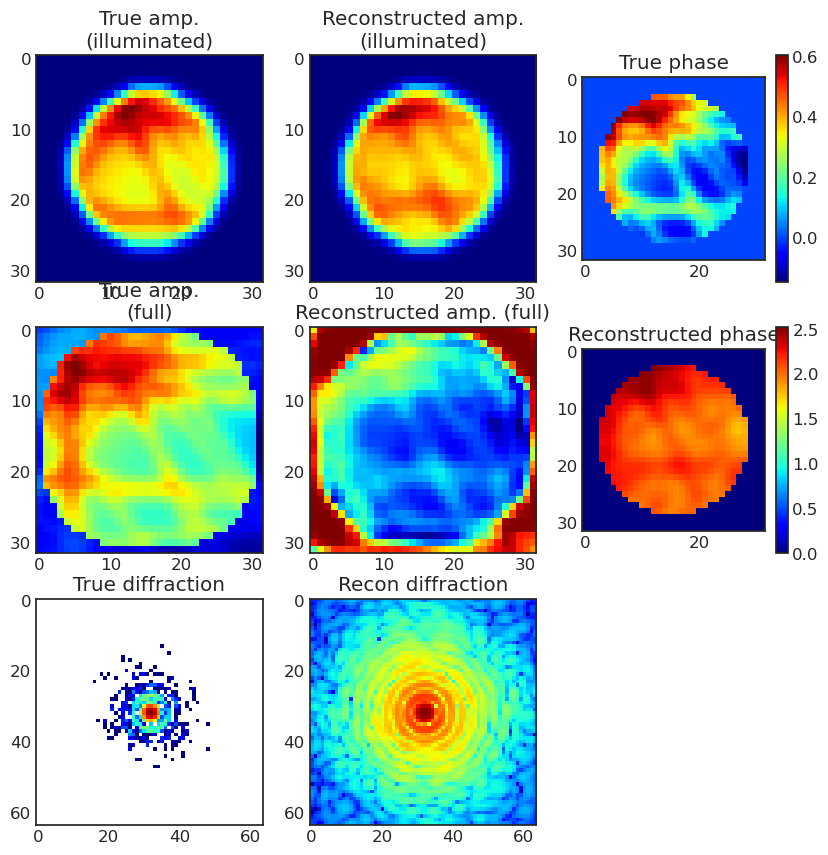

In [13]:
from ptycho import evaluation
evaluation.summarize(10, a, b, X_test, Y_I_test, Y_phi_test, probe.probe, 0)

## With MAE instead of NLL

In [14]:
from importlib import reload
import matplotlib.pyplot as plt
from ptycho import params as p

p.cfg['offset'] = 4

# Swap NLL and MAE weights
p.cfg['nll_weight'] = 0.
p.cfg['mae_weight'] = 1.
p.cfg['intensity_scale.trainable'] = True
p.cfg['object.big'] = True
p.cfg['n_filters_scale'] = 2


from ptycho import train, model
reload(model)
reload(train)

p.cfg
from ptycho.train import *

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input (InputLayer)             [(None, 64, 64, 4)]  0           []                               
                                                                                                  
 intensity_scaler (IntensitySca  (None, 64, 64, 4)   1           ['input[0][0]']                  
 ler)                                                                                             
                                                                                                  
 conv2d (Conv2D)                (None, 64, 64, 64)   2368        ['intensity_scaler[0][0]']       
                                                                                                  
 conv2d_1 (Conv2D)              (None, 64, 64, 64)   36928       ['conv2d[0][0]']           

                                                                                                  
 distribution_lambda (Distribut  ((None, 64, 64, 4),  0          ['intensity_scaler_inv[0][0]']   
 ionLambda)                      (None, 64, 64, 4))                                               
                                                                                                  
Total params: 4,401,414
Trainable params: 4,397,318
Non-trainable params: 4,096
__________________________________________________________________________________________________
None
offset 4


2023-04-24 13:44:18.983840: I tensorflow/core/profiler/lib/profiler_session.cc:101] Profiler session initializing.
2023-04-24 13:44:18.983853: I tensorflow/core/profiler/lib/profiler_session.cc:116] Profiler session started.


using nominal scan positions for training


2023-04-24 13:44:19.308169: I tensorflow/core/profiler/lib/profiler_session.cc:128] Profiler session tear down.
2023-04-24 13:44:19.308266: I tensorflow/core/profiler/backends/gpu/cupti_tracer.cc:1798] CUPTI activity buffer flushed


Epoch 1/60
732/732 [==============================] - 11s 14ms/step - loss: 0.1017 - trimmed_obj_loss: 0.1420 - intensity_scaler_inv_loss: 0.1017 - distribution_lambda_loss: 5164.0024 - probe_illumination_loss: 0.0306 - val_loss: 0.0934 - val_trimmed_obj_loss: 0.1690 - val_intensity_scaler_inv_loss: 0.0934 - val_distribution_lambda_loss: 4008.1418 - val_probe_illumination_loss: 0.0314 - lr: 0.0010
Epoch 2/60
732/732 [==============================] - 10s 13ms/step - loss: 0.0924 - trimmed_obj_loss: 0.1717 - intensity_scaler_inv_loss: 0.0924 - distribution_lambda_loss: 3889.0359 - probe_illumination_loss: 0.0306 - val_loss: 0.0906 - val_trimmed_obj_loss: 0.1708 - val_intensity_scaler_inv_loss: 0.0906 - val_distribution_lambda_loss: 3710.2217 - val_probe_illumination_loss: 0.0314 - lr: 0.0010
Epoch 3/60
732/732 [==============================] - 10s 13ms/step - loss: 0.0898 - trimmed_obj_loss: 0.1720 - intensity_scaler_inv_loss: 0.0898 - distribution_lambda_loss: 3698.9204 - probe_illumi

732/732 [==============================] - 10s 13ms/step - loss: 0.0842 - trimmed_obj_loss: 0.1425 - intensity_scaler_inv_loss: 0.0842 - distribution_lambda_loss: 3401.0879 - probe_illumination_loss: 0.0306 - val_loss: 0.0838 - val_trimmed_obj_loss: 0.1411 - val_intensity_scaler_inv_loss: 0.0838 - val_distribution_lambda_loss: 3365.6689 - val_probe_illumination_loss: 0.0314 - lr: 5.0000e-04
Epoch 21/60
732/732 [==============================] - 9s 13ms/step - loss: 0.0839 - trimmed_obj_loss: 0.1428 - intensity_scaler_inv_loss: 0.0839 - distribution_lambda_loss: 3384.4912 - probe_illumination_loss: 0.0306 - val_loss: 0.0836 - val_trimmed_obj_loss: 0.1418 - val_intensity_scaler_inv_loss: 0.0836 - val_distribution_lambda_loss: 3352.9138 - val_probe_illumination_loss: 0.0314 - lr: 2.5000e-04
Epoch 22/60
732/732 [==============================] - 9s 13ms/step - loss: 0.0839 - trimmed_obj_loss: 0.1422 - intensity_scaler_inv_loss: 0.0839 - distribution_lambda_loss: 3383.7224 - probe_illuminat

Epoch 39/60
732/732 [==============================] - 10s 13ms/step - loss: 0.0835 - trimmed_obj_loss: 0.1360 - intensity_scaler_inv_loss: 0.0835 - distribution_lambda_loss: 3368.9924 - probe_illumination_loss: 0.0306 - val_loss: 0.0833 - val_trimmed_obj_loss: 0.1350 - val_intensity_scaler_inv_loss: 0.0833 - val_distribution_lambda_loss: 3345.1299 - val_probe_illumination_loss: 0.0314 - lr: 1.0000e-04
Epoch 40/60
732/732 [==============================] - 10s 13ms/step - loss: 0.0835 - trimmed_obj_loss: 0.1358 - intensity_scaler_inv_loss: 0.0835 - distribution_lambda_loss: 3368.7874 - probe_illumination_loss: 0.0306 - val_loss: 0.0833 - val_trimmed_obj_loss: 0.1342 - val_intensity_scaler_inv_loss: 0.0833 - val_distribution_lambda_loss: 3347.3945 - val_probe_illumination_loss: 0.0314 - lr: 1.0000e-04
Epoch 41/60
732/732 [==============================] - 10s 13ms/step - loss: 0.0835 - trimmed_obj_loss: 0.1355 - intensity_scaler_inv_loss: 0.0835 - distribution_lambda_loss: 3368.1111 - p

732/732 [==============================] - 10s 13ms/step - loss: 0.0833 - trimmed_obj_loss: 0.1313 - intensity_scaler_inv_loss: 0.0833 - distribution_lambda_loss: 3361.8821 - probe_illumination_loss: 0.0306 - val_loss: 0.0832 - val_trimmed_obj_loss: 0.1303 - val_intensity_scaler_inv_loss: 0.0832 - val_distribution_lambda_loss: 3336.9160 - val_probe_illumination_loss: 0.0314 - lr: 1.0000e-04
Epoch 60/60
129/129 [==============================] - 7s 49ms/step


In [15]:
stitched_obj = reassemble(b, part = 'complex')
_, (mae_amp, mae_phi), (mse_amp, mse_phi) = eval_pinn(stitched_obj, YY_ground_truth)
(mae_amp, mae_phi), (mse_amp, mse_phi)

mean scale adjustment: 4.1919017
mean scale adjustment: 4.1919017
mean scale adjustment: 1
mean scale adjustment: 1


((0.026562707, 0.038781103804574536), (0.0010816128, 0.002345648478961911))

In [16]:
stitched_obj = reassemble(b, part = 'complex')
_, (mae_amp, mae_phi), (mse_amp, mse_phi) = eval_pinn(stitched_obj, YY_ground_truth)
(mae_amp, mae_phi), (mse_amp, mse_phi)

mean scale adjustment: 4.1919017
mean scale adjustment: 4.1919017
mean scale adjustment: 1
mean scale adjustment: 1


((0.026562707, 0.038781103804574536), (0.0010816128, 0.002345648478961911))

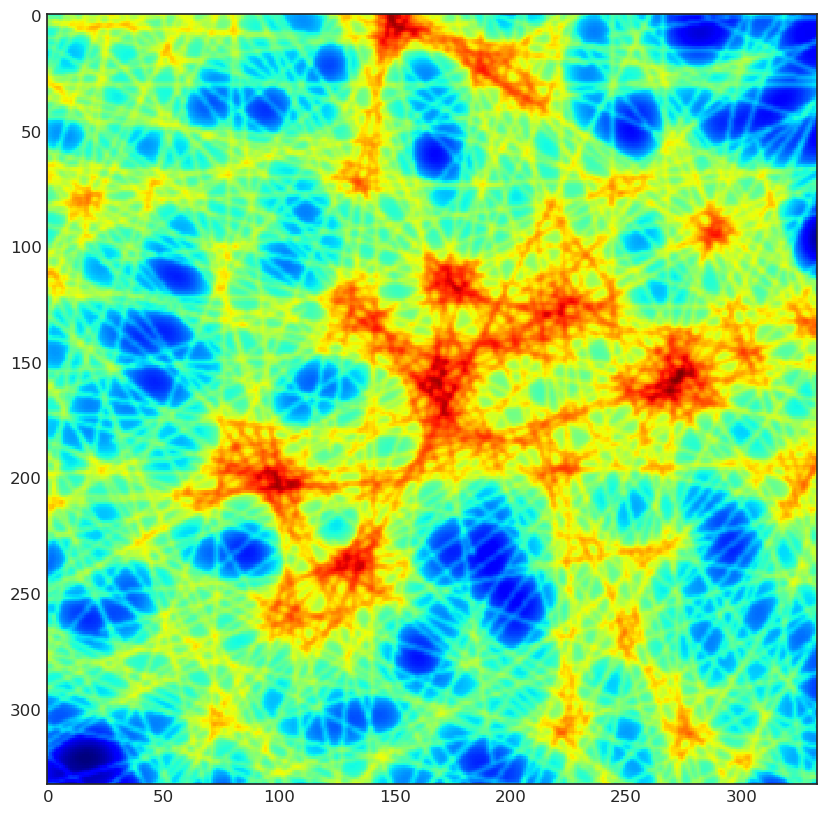

In [17]:
plt.imshow(np.absolute(init.YY_ground_truth), interpolation = 'none',
          cmap = 'jet')

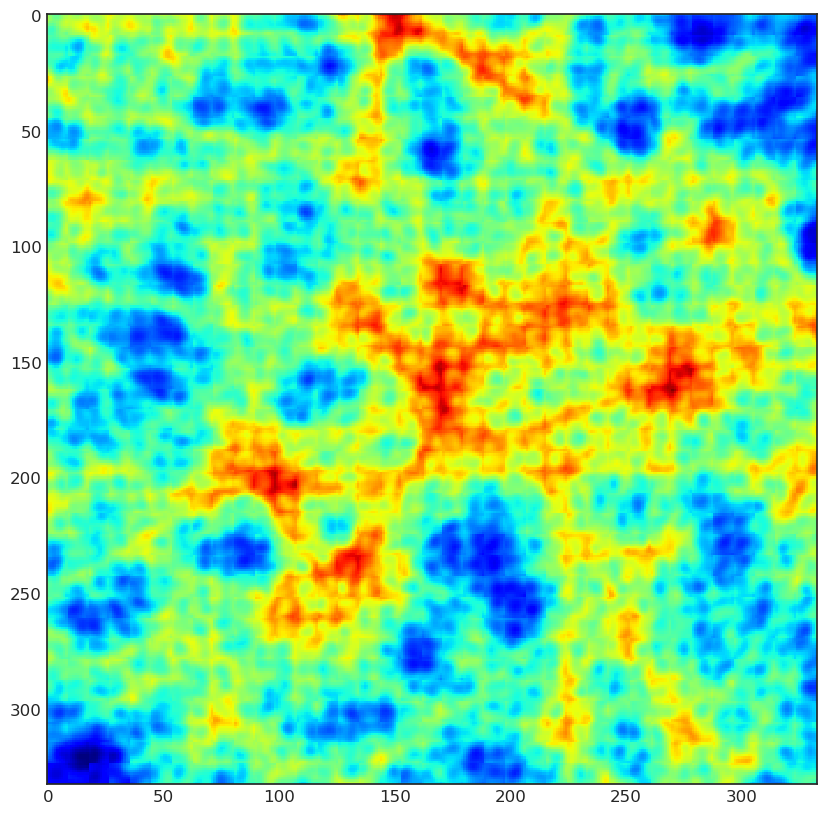

In [18]:
plt.rcParams["figure.figsize"] = (10, 10)

stitched = stitch(b, norm_Y_I_test,
                  #nsegments=37,
                  norm = False)

plt.imshow(stitched[0], interpolation = 'none', cmap = 'jet')
#plt.imshow(stitched[0], interpolation = 'none', vmin = vmin, vmax = vmax, cmap = 'jet')

phase min: 0.0 phase max: 2.6202595


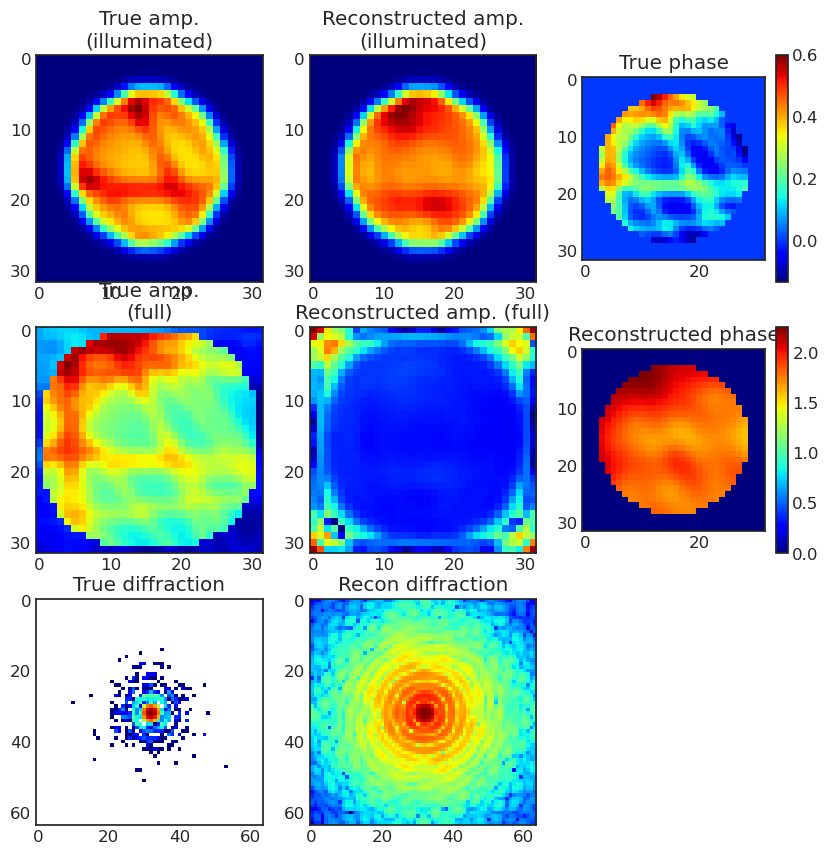

In [19]:
# Offset 4, jitter = 0 val_loss: 2625558.
from ptycho import evaluation
evaluation.summarize(10, a, b, X_test, Y_I_test, Y_phi_test, probe.probe, 2)

## PtychoNN with overlaps

In [20]:
from importlib import reload
import matplotlib.pyplot as plt

from ptycho import params as p

p.cfg['data_source'] = 'grf'
p.cfg['n_filters_scale'] = 1
p.cfg['gridsize'] = 2

# reload(init.datasets)
# reload(init)
from ptycho.generate_data import *

In [21]:
baseline_model_overlap = bl.train((X_train[:, :, :, :4]),
                          Y_I_train[:, :, :, :4], Y_phi_train[:, :, :, :4])

baseline_overlap_pred_I, baseline_overlap_pred_phi = baseline_model_overlap.predict(
    [X_test[:, :, :, :4]  * bl.params.params()['intensity_scale']])
baseline_overlap_stitched = stitch(baseline_overlap_pred_I[:, :, :, :1], norm_Y_I_test)


# For comparison to the 'baseline' model (PtychoNN) we need to crop/shift in a different way
def xyshift(arr4d, dx, dy):
    assert len(arr4d.shape) == 4
    from scipy.ndimage.interpolation import shift
    arr4d = np.roll(arr4d, dx, axis = 1)
    arr4d = np.roll(arr4d, dy, axis = 2)
    return arr4d

YY_baseline_overlap = xyshift(baseline_overlap_stitched, -2, -2)
YY_phi_baseline_overlap = xyshift(stitch(baseline_overlap_pred_phi[:, :, :, :1], 1), -2, -2)
stitched_obj = hh.combine_complex(YY_baseline_overlap, YY_phi_baseline_overlap)

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 64, 64, 4)]  0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 64, 64, 64)   2368        ['input_1[0][0]']                
                                                                                                  
 conv2d_1 (Conv2D)              (None, 64, 64, 64)   36928       ['conv2d[0][0]']                 
                                                                                                  
 max_pooling2d (MaxPooling2D)   (None, 32, 32, 64)   0           ['conv2d_1[0][0]']               
                                                                                              

Epoch 7/60
366/366 [==============================] - 8s 22ms/step - loss: 0.2700 - conv2d_12_loss: 0.0614 - conv2d_19_loss: 0.2086 - val_loss: 0.2732 - val_conv2d_12_loss: 0.0607 - val_conv2d_19_loss: 0.2124 - lr: 2.5000e-04
Epoch 8/60
364/366 [============================>.] - ETA: 0s - loss: 0.2700 - conv2d_12_loss: 0.0614 - conv2d_19_loss: 0.2086
Epoch 8: ReduceLROnPlateau reducing learning rate to 0.0001250000059371814.
366/366 [==============================] - 8s 22ms/step - loss: 0.2700 - conv2d_12_loss: 0.0614 - conv2d_19_loss: 0.2086 - val_loss: 0.2730 - val_conv2d_12_loss: 0.0607 - val_conv2d_19_loss: 0.2123 - lr: 2.5000e-04
Epoch 9/60
366/366 [==============================] - 8s 22ms/step - loss: 0.2700 - conv2d_12_loss: 0.0614 - conv2d_19_loss: 0.2086 - val_loss: 0.2730 - val_conv2d_12_loss: 0.0607 - val_conv2d_19_loss: 0.2123 - lr: 1.2500e-04
Epoch 10/60
364/366 [============================>.] - ETA: 0s - loss: 0.2699 - conv2d_12_loss: 0.0614 - conv2d_19_loss: 0.2085
Ep

366/366 [==============================] - 8s 22ms/step - loss: 0.1236 - conv2d_12_loss: 0.0034 - conv2d_19_loss: 0.1201 - val_loss: 0.1564 - val_conv2d_12_loss: 0.0034 - val_conv2d_19_loss: 0.1530 - lr: 1.0000e-04
Epoch 42/60
366/366 [==============================] - 8s 22ms/step - loss: 0.1214 - conv2d_12_loss: 0.0034 - conv2d_19_loss: 0.1180 - val_loss: 0.1564 - val_conv2d_12_loss: 0.0034 - val_conv2d_19_loss: 0.1531 - lr: 1.0000e-04
Epoch 43/60
366/366 [==============================] - 8s 22ms/step - loss: 0.1198 - conv2d_12_loss: 0.0034 - conv2d_19_loss: 0.1164 - val_loss: 0.1590 - val_conv2d_12_loss: 0.0035 - val_conv2d_19_loss: 0.1555 - lr: 1.0000e-04
Epoch 44/60
366/366 [==============================] - 8s 22ms/step - loss: 0.1183 - conv2d_12_loss: 0.0034 - conv2d_19_loss: 0.1149 - val_loss: 0.1607 - val_conv2d_12_loss: 0.0034 - val_conv2d_19_loss: 0.1573 - lr: 1.0000e-04
Epoch 45/60
366/366 [==============================] - 8s 22ms/step - loss: 0.1166 - conv2d_12_loss: 0.0

In [22]:
# stitched_obj = reassemble(b, part = 'complex')
_, (mae_amp, mae_phi), (mse_amp, mse_phi) = eval_pinn(stitched_obj, YY_ground_truth)
(mae_amp, mae_phi), (mse_amp, mse_phi)

mean scale adjustment: 0.23159122
mean scale adjustment: 0.23159122
mean scale adjustment: 1
mean scale adjustment: 1


((0.032441806, 0.16555182692235373), (0.0015910111, 0.05011420830047018))

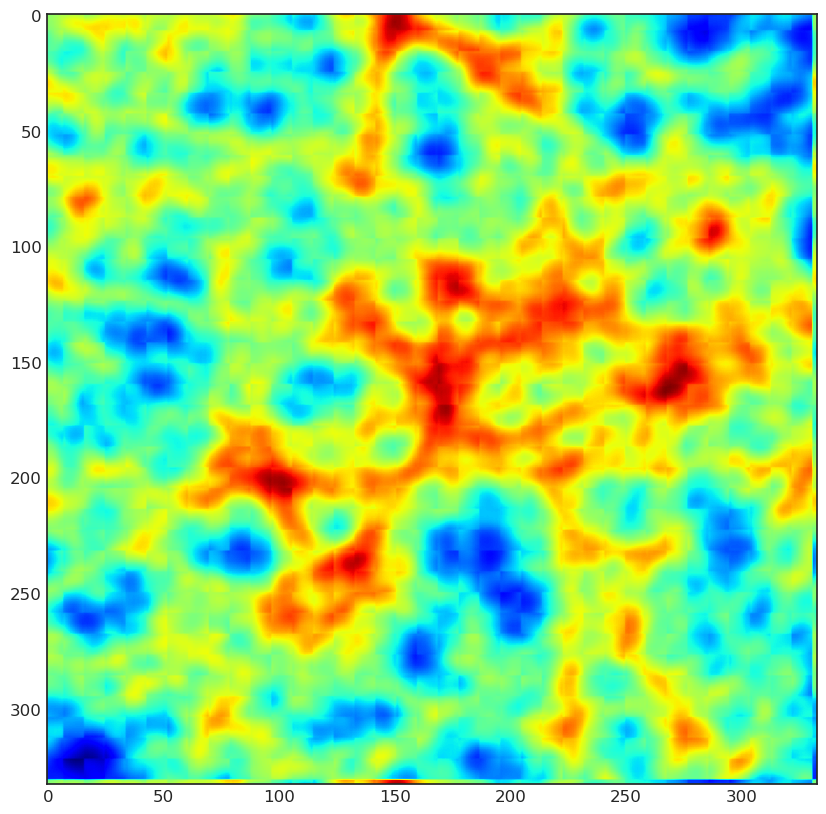

In [23]:
plt.imshow(np.absolute(stitched_obj[0]),
          cmap = 'jet')

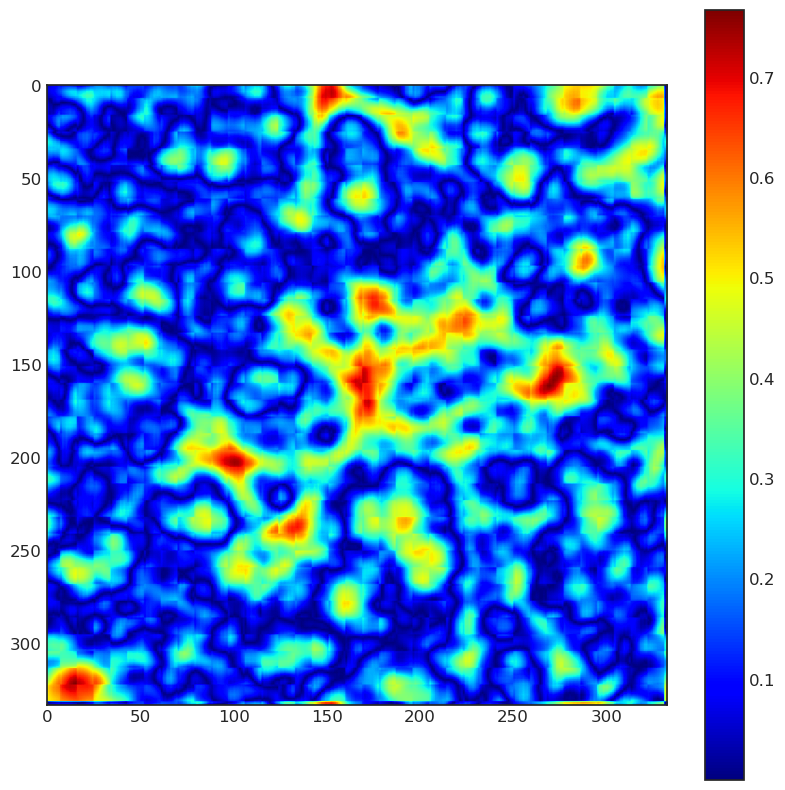

In [24]:
plt.imshow(np.angle(stitched_obj[0]),
          cmap = 'jet')
plt.colorbar()